In [1]:
import seml
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Get results for SCANVI, SCVI, MARS, SVM

In [34]:
results = {}

In [37]:
results['scanvi'] = seml.get_results('scanvi', to_data_frame=True)
for score in list(results['scanvi']['result.integration_scores'].loc[0].columns):
    results['scanvi'][f'result.{score}'] = results['scanvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scanvi']['result.f1-score-macro'] = results['scanvi']['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['scanvi']['result.f1-score-weighted'] = results['scanvi']['result.classification_report'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['scanvi'] = results['scanvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.PCR_batch',
    'result.graph_conn',
    'result.ebm',
    'result.knn',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['scanvi'] = results['scanvi'].assign(method='scanvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [38]:
results['scvi'] = seml.get_results('scvi', to_data_frame=True)
for score in list(results['scvi']['result.integration_scores'].loc[0].columns):
    results['scvi'][f'result.{score}'] = results['scvi']['result.integration_scores'].apply(
        lambda x: x[score]
    )
results['scvi'] = results['scvi'][[
    'config.data',
    'result.reference_time',
    'result.query_time',
    'result.PCR_batch',
    'result.graph_conn',
    'result.ebm',
    'result.knn',
]]
results['scvi'] = results['scvi'].assign(method='scvi')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [40]:
results['svm']

,_id,result,config.overwrite,config.db_collection,config.data,config.seed
0,1,precision recall f1-sc...,1,svm,pancreas,382930865
1,2,precision ...,2,svm,pbmc,964015630
2,3,precision r...,3,svm,brain,234138617
3,4,precision recall f1-score ...,4,svm,scvelo,97454376
4,5,preci...,5,svm,tumor,930327869
5,6,precision recall f1-...,6,svm,lung,807274329


In [42]:
results['svm'] = seml.get_results('svm', to_data_frame=True)
results['svm']['result.f1-score-macro'] = results['svm']['result'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['svm']['result.f1-score-weighted'] = results['svm']['result'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['svm'] = results['svm'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['svm'] = results['svm'].assign(method='svm')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [45]:
results['mars'] = seml.get_results('mars', to_data_frame=True)
results['mars']['result.f1-score-macro'] = results['mars']['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
results['mars']['result.f1-score-weighted'] = results['mars']['result.classification_report'].apply(
    lambda x: x.loc['weighted avg']['f1-score']
)
results['mars'] = results['mars'][[
    'config.data',
    'result.f1-score-macro',
    'result.f1-score-weighted'
]]
results['mars'] = results['mars'].assign(method='mars')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [47]:
results = pd.concat(results.values())

In [48]:
results

,config.data,result.reference_time,result.query_time,result.PCR_batch,result.graph_conn,result.ebm,result.knn,result.f1-score-macro,result.f1-score-weighted,method
0,pancreas,321.904196,33.797830,0.673290,0.839503,0.481371,0.880166,0.637686,0.959443,scanvi
1,pbmc,540.251999,35.882633,0.814409,0.985532,0.488167,0.903543,0.686802,0.893522,scanvi
2,brain,1020.345757,800.859073,0.000000,0.983772,0.169206,0.921403,0.630583,0.836046,scanvi
3,scvelo,411.428346,104.406015,0.000000,0.983480,0.514798,0.743141,0.305524,0.397358,scanvi
4,tumor,1024.703243,612.659147,0.000000,0.757058,0.227003,0.620419,0.281305,0.449389,scanvi
5,lung,481.070197,132.373925,0.000000,0.809649,0.082713,0.880576,0.404742,0.558878,scanvi
0,pancreas,305.027829,34.177540,0.739987,0.849049,0.476725,0.859734,NaN,NaN,scvi
1,pbmc,485.604269,33.067524,0.852156,0.939715,0.487416,0.872595,NaN,NaN,scvi
2,brain,458.334903,810.245600,0.000000,0.982785,0.154869,0.917096,NaN,NaN,scvi
3,scvelo,364.298118,94.277753,0.072850,0.982746,0.512711,0.701833,NaN,NaN,scvi


# Get results for symphony and seurat

In [87]:
r_scores = pd.read_pickle('seurat/scores.pickle')
r_scores.reset_index(inplace=True)
r_scores = r_scores[r_scores['index'].isin(['PCR_batch', 'graph_conn', 'ebm', 'knn'])]
r_scores.columns = ['metric', 'value', 'config.data', 'method']

In [88]:
r_scores = r_scores.pivot(index=['config.data', 'method'], columns='metric', values='value')
r_scores.columns = ['result.' + x for x in r_scores.columns]

In [89]:
r_scores.reset_index(inplace=True)

In [92]:
results = pd.concat([results, r_scores])

# Visualization

In [99]:
integration_methods = ['scanvi', 'scvi', 'seurat', 'symphony']
classification_methods = ['scanvi', 'seurat', 'svm', 'mars']

<AxesSubplot:xlabel='config.data', ylabel='result.ebm'>

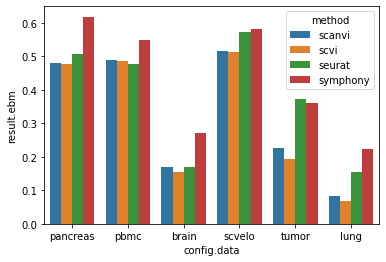

In [96]:
sns.barplot(
    x='config.data', 
    y='result.ebm', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)

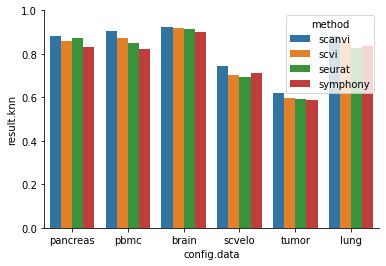

In [102]:
sns.barplot(
    x='config.data', 
    y='result.knn', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)
plt.ylim([0, 1])
sns.despine()

<AxesSubplot:xlabel='config.data', ylabel='result.graph_conn'>

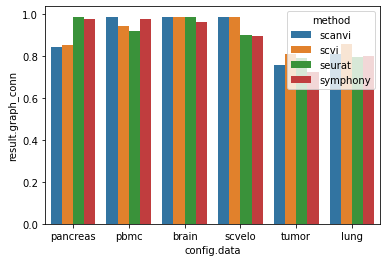

In [98]:
sns.barplot(
    x='config.data', 
    y='result.graph_conn', 
    hue='method', 
    data=results[results['method'].isin(integration_methods)]
)

<AxesSubplot:xlabel='config.data', ylabel='result.f1-score-macro'>

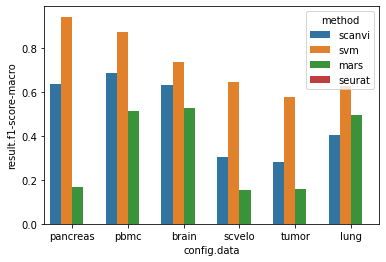

In [100]:
sns.barplot(
    x='config.data',
    y='result.f1-score-macro',
    hue='method',
    data=results[results['method'].isin(classification_methods)]
)